In [1]:
import pandas as pd

df = pd.read_csv('Pima_Indians_Diabetes_Database.csv')

In [2]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
x_axis = []
y_inertia = []
y_silhouette_score = []
for k in range(2, 31):
    x_axis.append(k)
    kmeans = KMeans(n_clusters=k)
    y_pred = kmeans.fit_predict(df)
    silhouette = silhouette_score(df, kmeans.labels_)
    print(k, kmeans.inertia_, silhouette)
    y_inertia.append(kmeans.inertia_)
    y_silhouette_score.append(silhouette)

2 5142544.699735325 0.5687788342658853
3 2913492.7246495183 0.5104110277535746
4 2150703.321398098 0.4277945680040127
5 1737485.2249923907 0.3936259493154483
6 1466961.2472826594 0.32830855338574905
7 1301305.6499553071 0.3274322717955121
8 1160735.185535716 0.33827999448272705
9 1001829.6229359307 0.34000555410829203
10 930637.7205212006 0.2896498383413402
11 877148.597413118 0.2646755764834398
12 810059.5679768112 0.2729771727654318
13 769331.0224241264 0.27686678961823646
14 731341.3778351414 0.270311787319364
15 703429.6790997923 0.26942106848742986
16 678903.1700265828 0.25570715621892165
17 644008.043211917 0.2703490450558075
18 631122.9137785826 0.25282322074587504
19 600505.1997109426 0.26416096257216215
20 587861.035611604 0.2523309688464938
21 563148.1282691649 0.2382161637135566
22 546093.601158499 0.23580036965755177
23 528349.6855995592 0.23459178370335057
24 515477.29754391557 0.2285581687464989
25 500930.50017762964 0.22571591523348297
26 482769.0295475814 0.236448416094

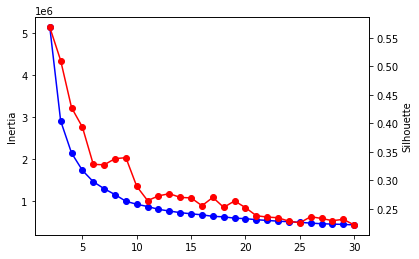

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax1.plot(x_axis, y_inertia, marker='o', color='blue')
ax1.set_ylabel('Inertia')
ax2 = ax1.twinx()
ax2.plot(x_axis, y_silhouette_score, marker='o', color='red')
ax2.set_ylabel('Silhouette')
plt.show()

In [5]:
add_combine = []
keys = df.keys().values

In [6]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
y_pred = kmeans.fit_predict(df)

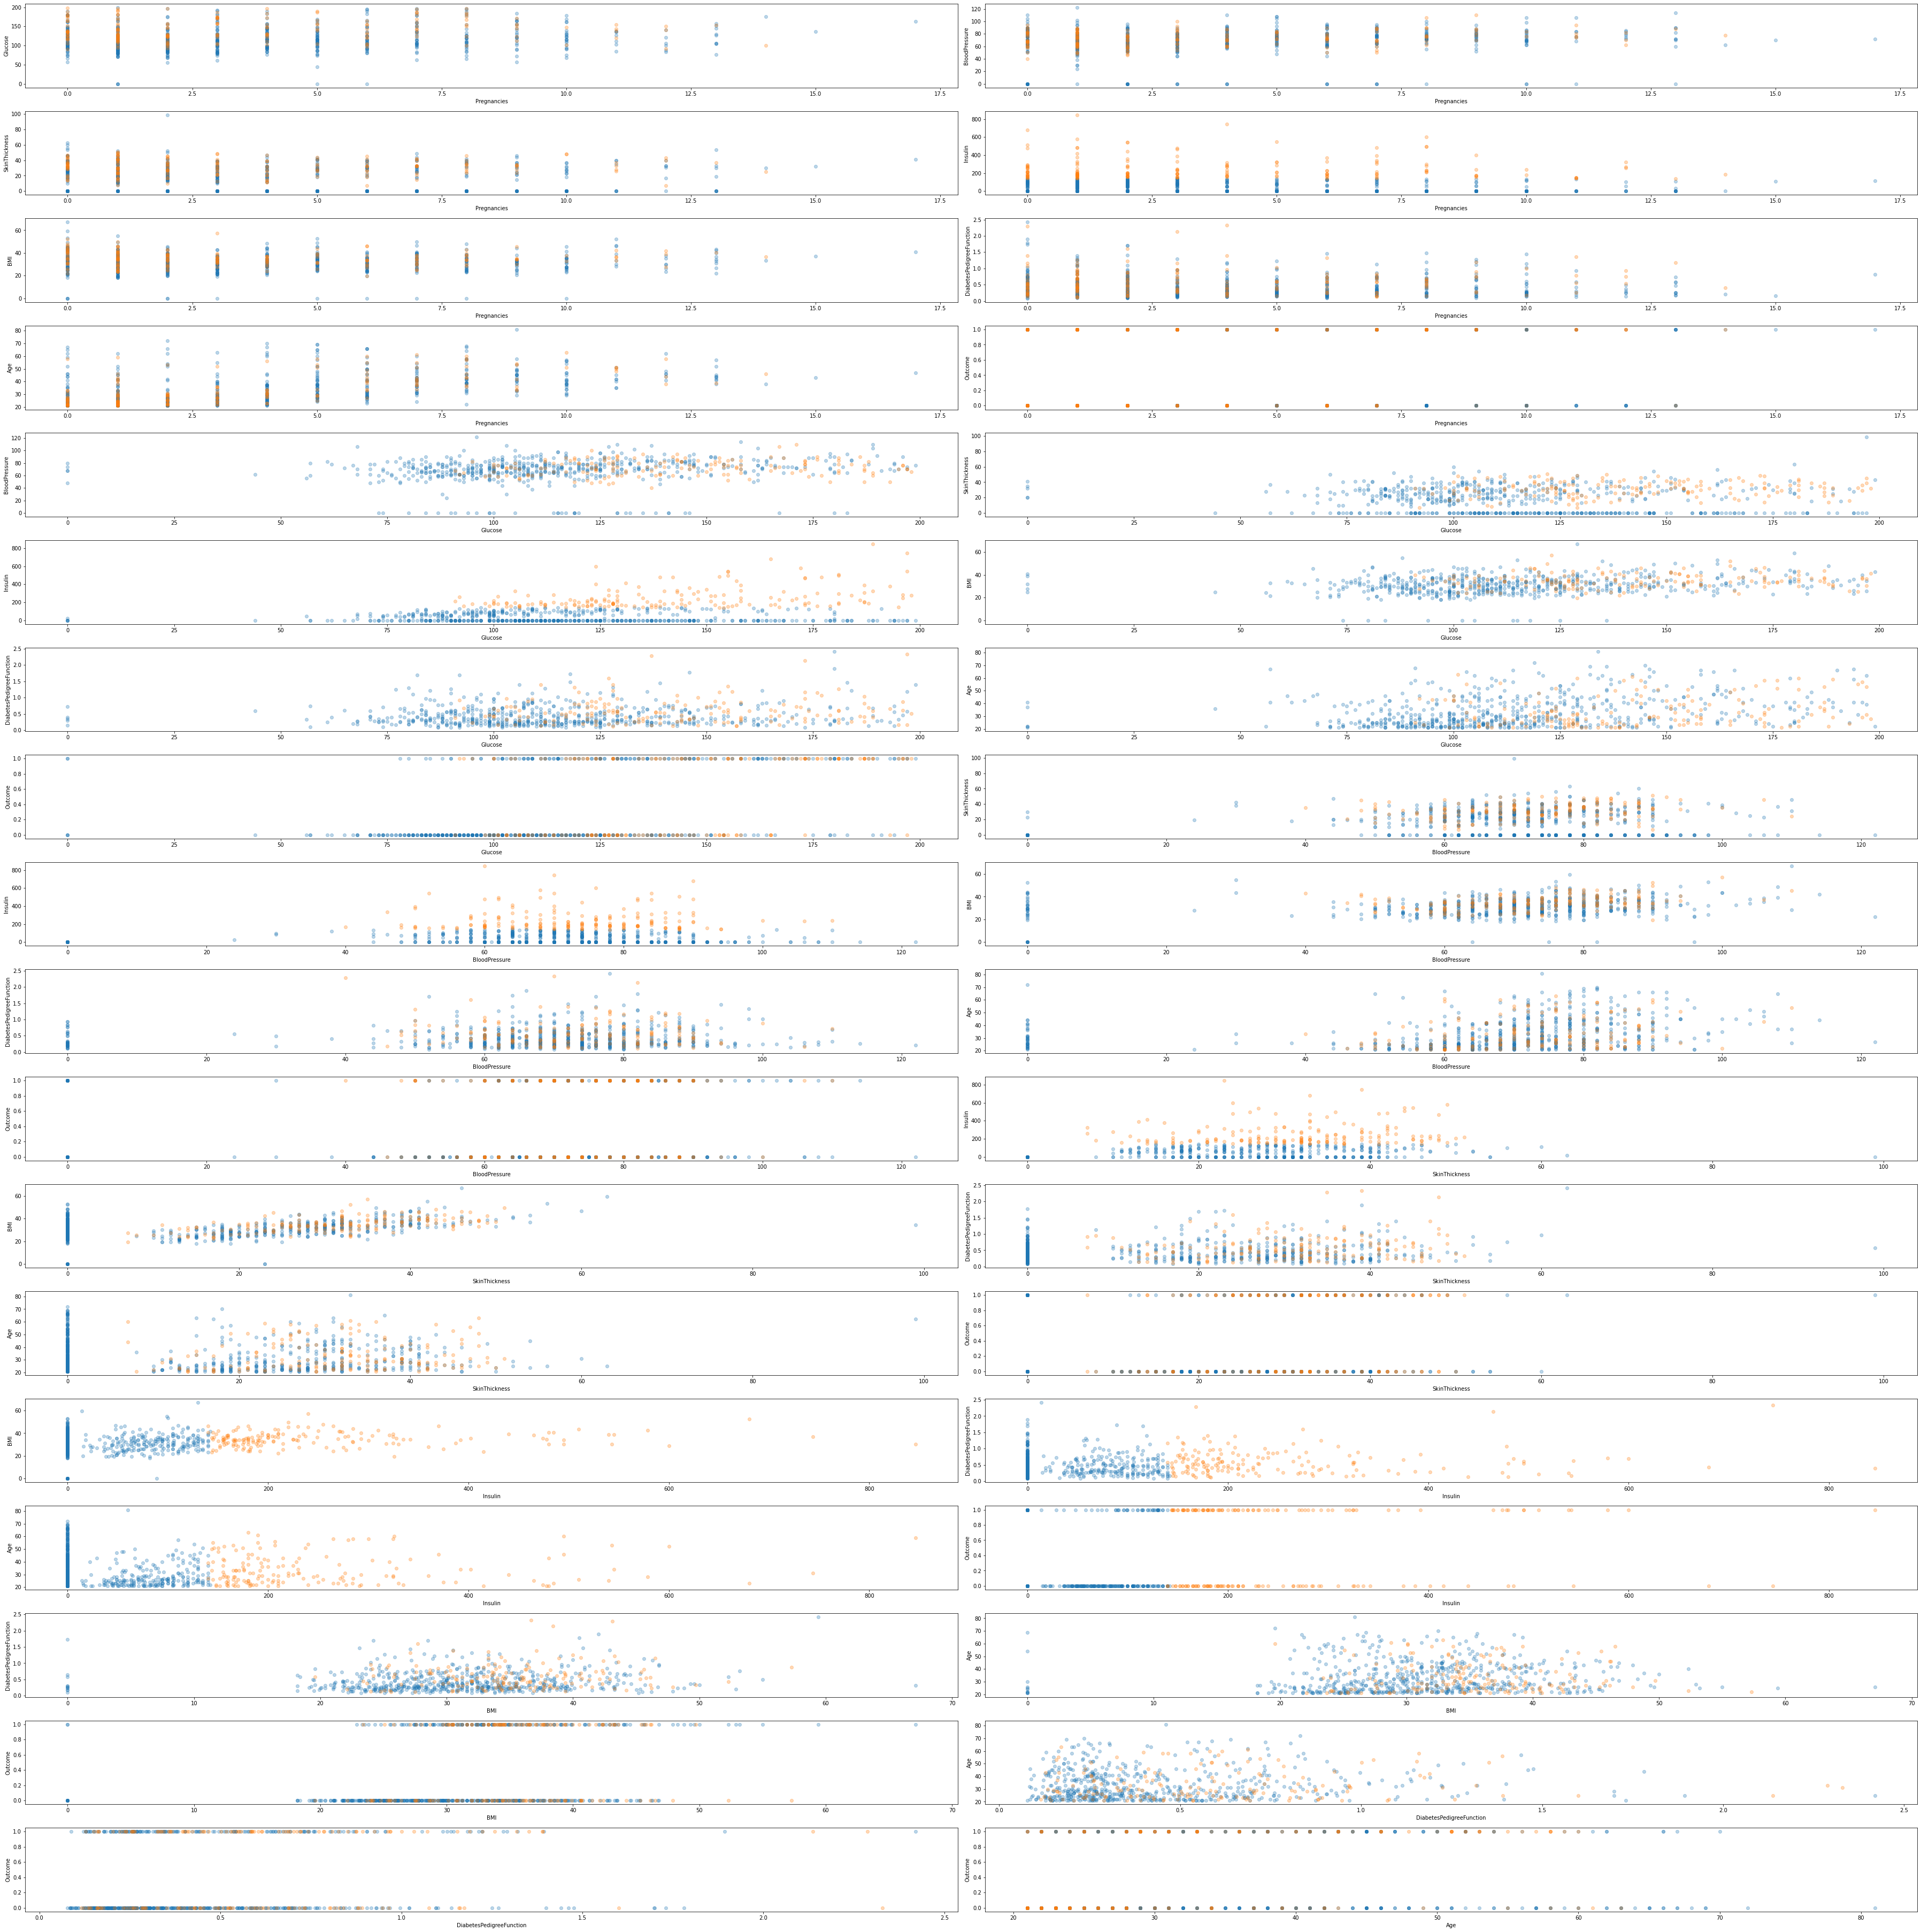

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

total = len(keys)*(len(keys)-1)
col = 2
row = int(total/2+0.5)
idx = 1

fig = plt.figure(figsize=(50,100))
for x_value_key in keys:
    for y_value_key in keys:
        if x_value_key == y_value_key:
            continue
        elif (x_value_key,y_value_key) in add_combine or (y_value_key,x_value_key) in add_combine:
            continue
        
        ax = fig.add_subplot(row,col,idx)
        ax.scatter(df[x_value_key][y_pred==0], df[y_value_key][y_pred==0], alpha=0.3)
        ax.scatter(df[x_value_key][y_pred==1], df[y_value_key][y_pred==1], alpha=0.3)
        ax.set_xlabel(x_value_key)
        ax.set_ylabel(y_value_key)
        add_combine.append((x_value_key,y_value_key))
        add_combine.append((y_value_key,x_value_key))
        idx += 1
plt.tight_layout()
plt.show()

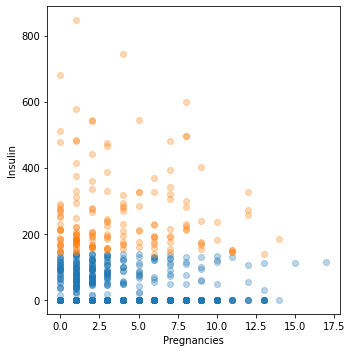

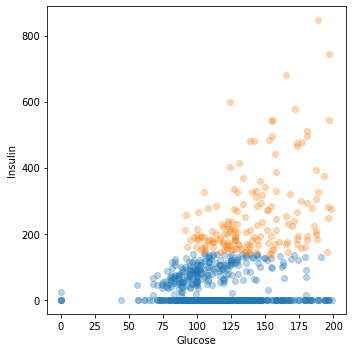

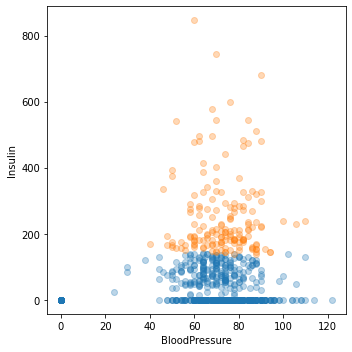

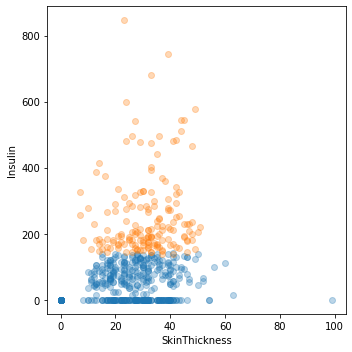

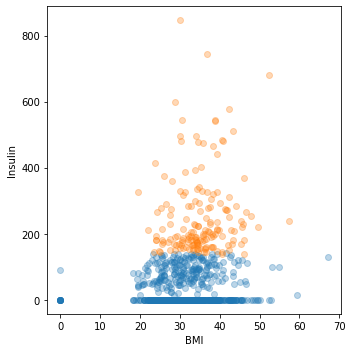

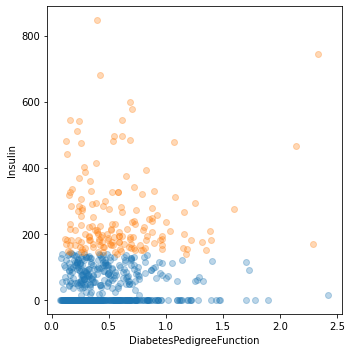

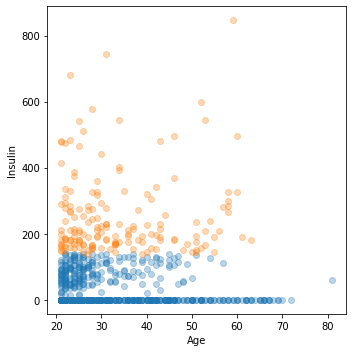

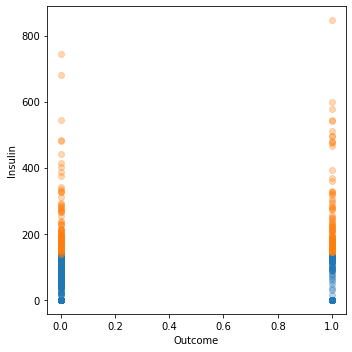

In [8]:
%matplotlib inline

keys = df.keys().drop('Insulin').values
import matplotlib.pyplot as plt
for x_value_key in keys:
    y_value_key = 'Insulin'
    plt.figure(figsize=(5,5))
    plt.scatter(df[x_value_key][y_pred==0], df[y_value_key][y_pred==0], alpha=0.3)
    plt.scatter(df[x_value_key][y_pred==1], df[y_value_key][y_pred==1], alpha=0.3)
    plt.xlabel(x_value_key)
    plt.ylabel(y_value_key)
    plt.tight_layout()
    plt.show()

In [9]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8)
y_pred = kmeans.fit_predict(df)

In [10]:
add_combine = []
keys = df.keys().values

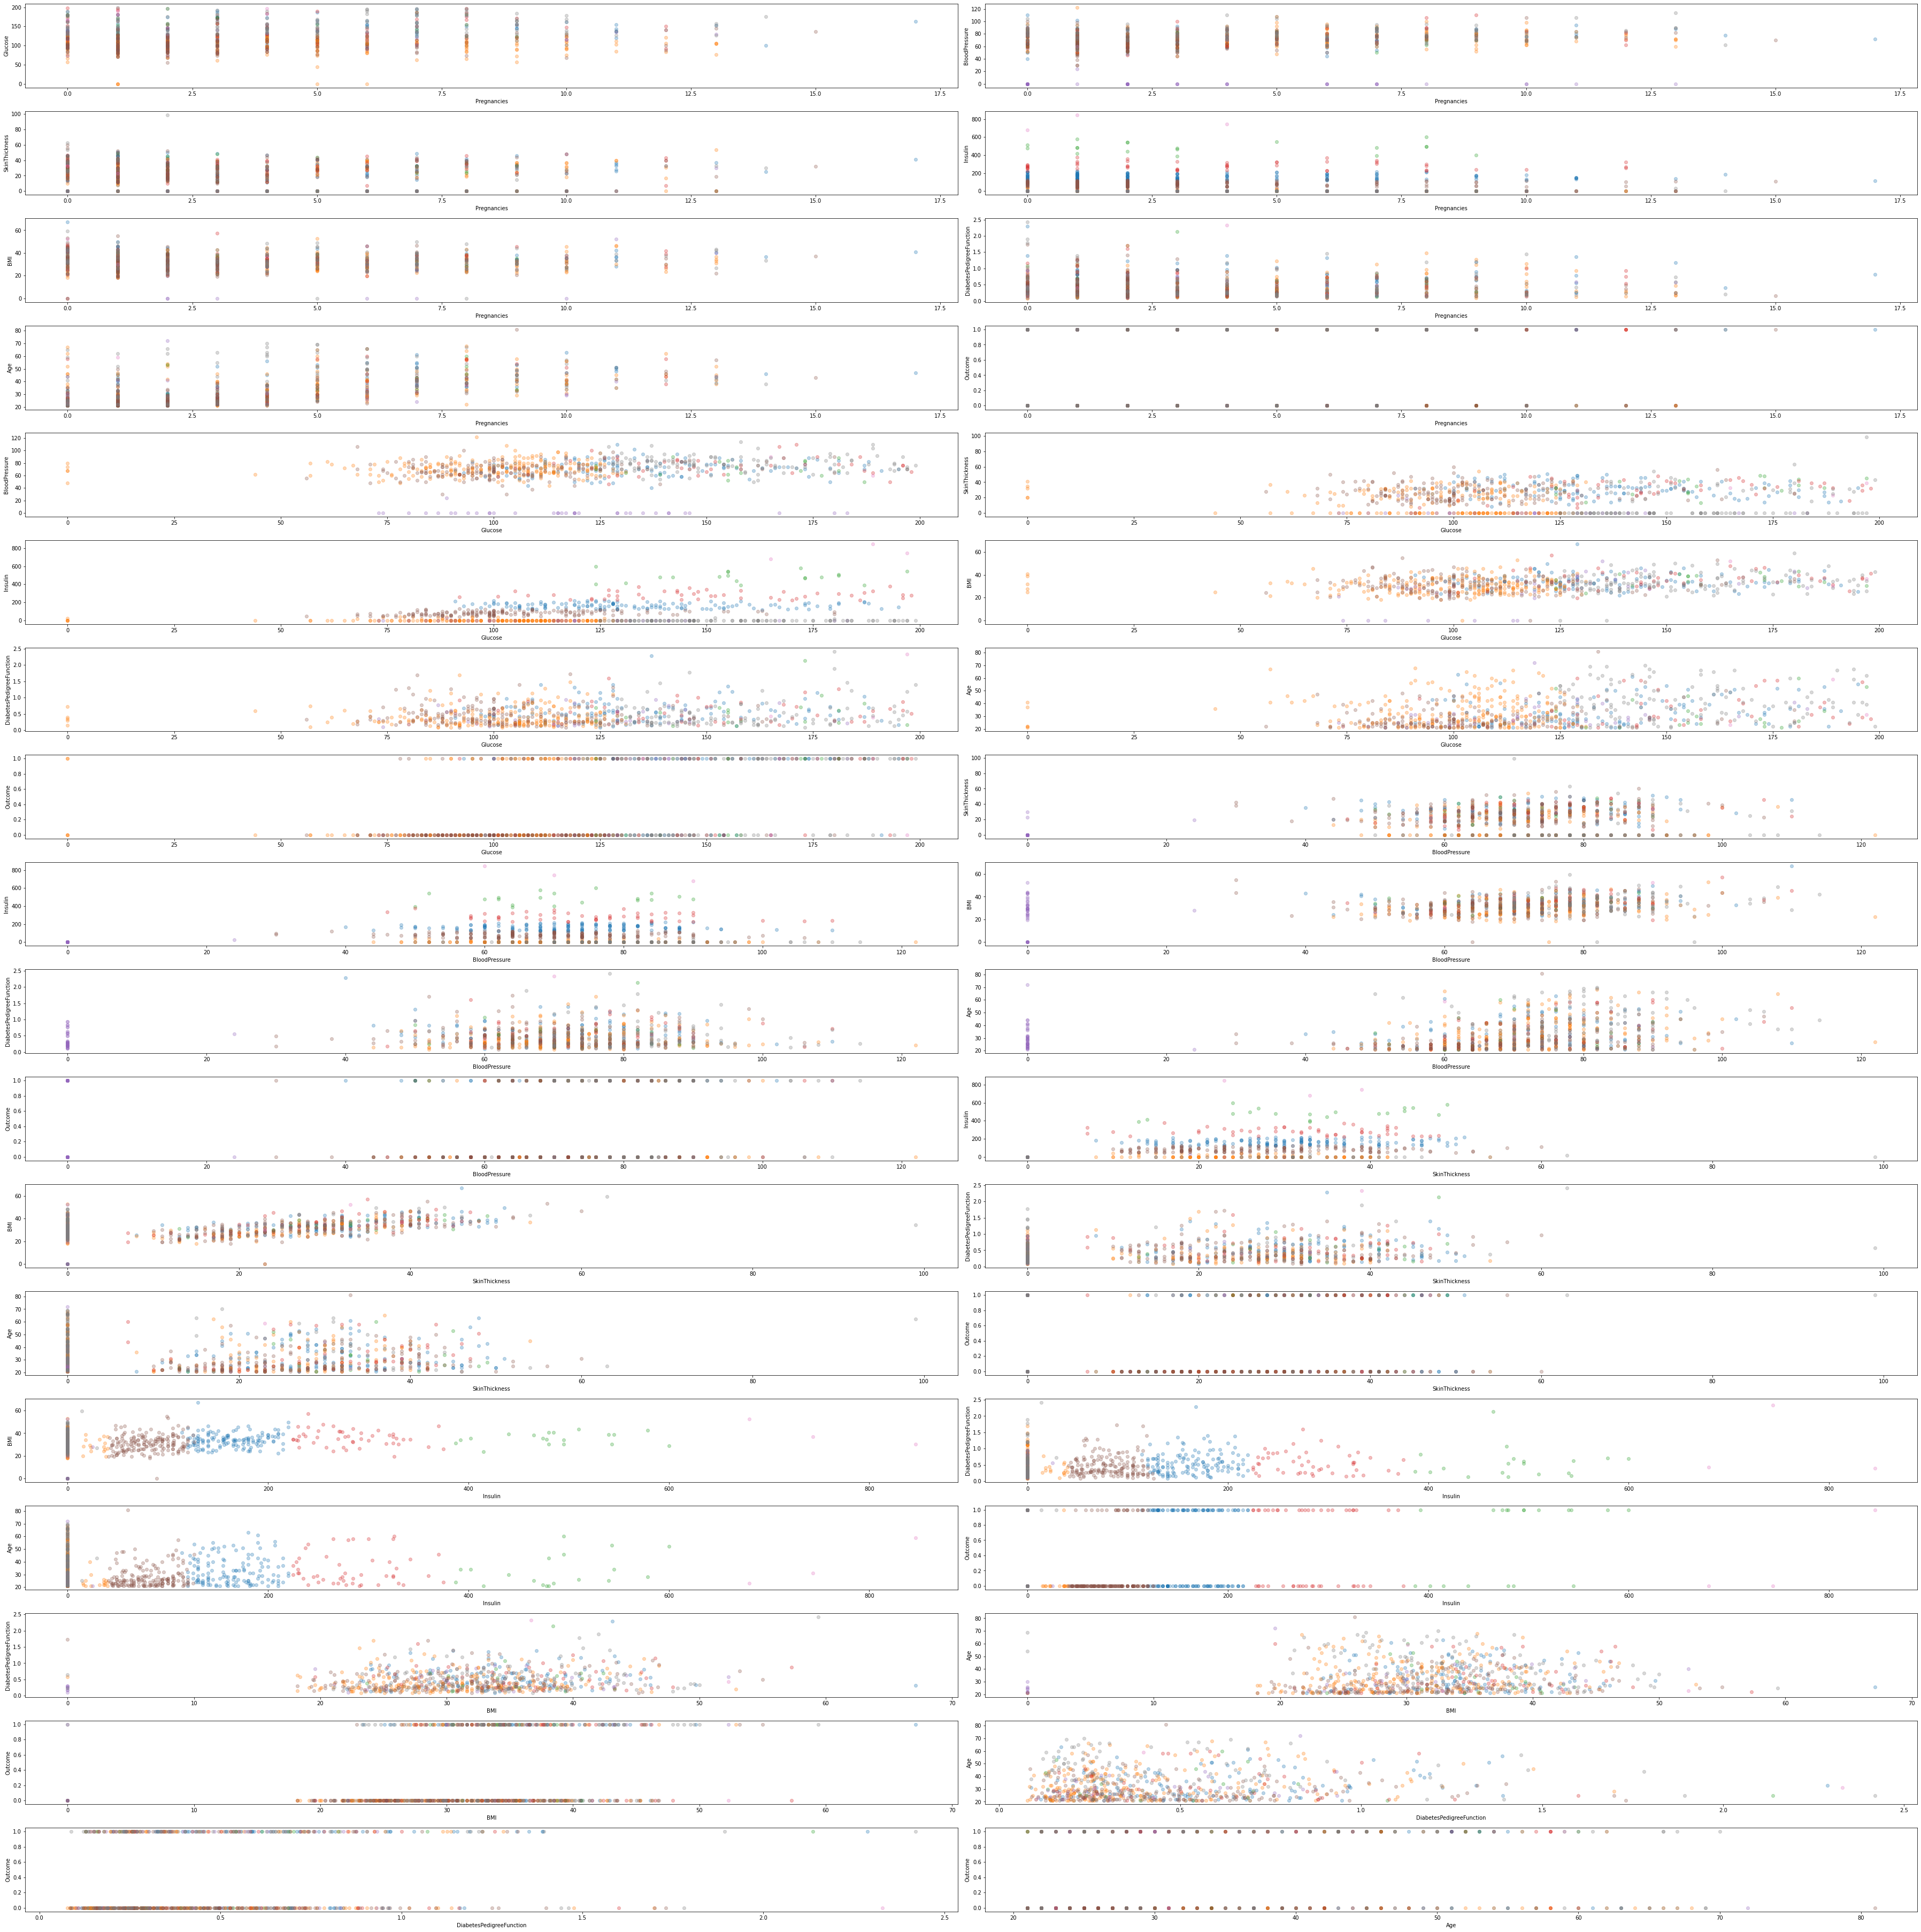

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

total = len(keys)*(len(keys)-1)
col = 2
row = int(total/2+0.5)
idx = 1

fig = plt.figure(figsize=(50,100))
for x_value_key in keys:
    for y_value_key in keys:
        if x_value_key == y_value_key:
            continue
        elif (x_value_key,y_value_key) in add_combine or (y_value_key,x_value_key) in add_combine:
            continue
        
        ax = fig.add_subplot(row,col,idx)
        for k in range(8):
            ax.scatter(df[x_value_key][y_pred==k], df[y_value_key][y_pred==k], alpha=0.3)
        
        ax.set_xlabel(x_value_key)
        ax.set_ylabel(y_value_key)
        add_combine.append((x_value_key,y_value_key))
        add_combine.append((y_value_key,x_value_key))
        idx += 1
plt.tight_layout()
plt.show()

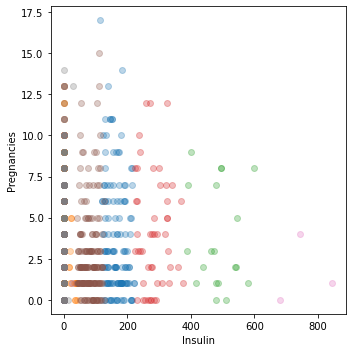

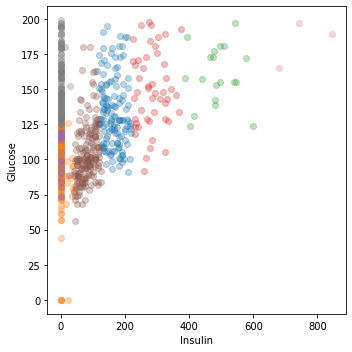

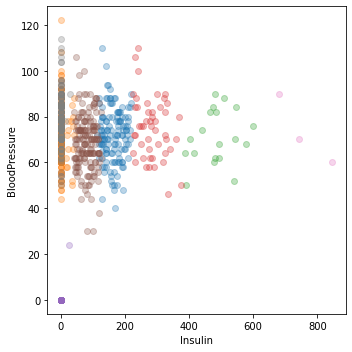

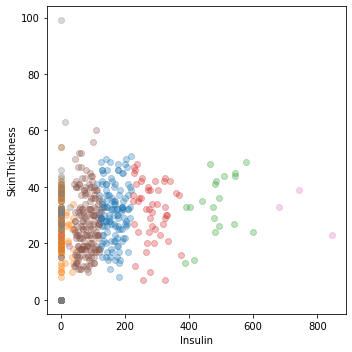

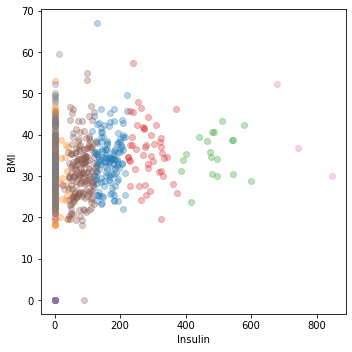

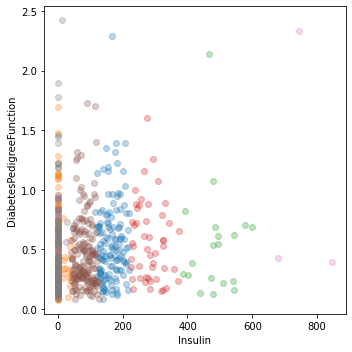

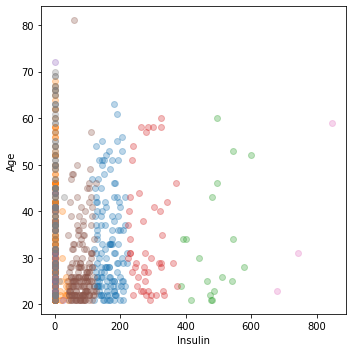

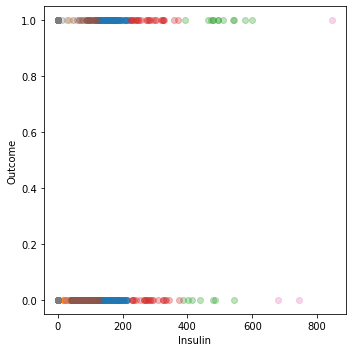

In [12]:
%matplotlib inline

keys = df.keys().drop('Insulin').values
import matplotlib.pyplot as plt
for y_value_key in keys:
    x_value_key = 'Insulin'
    plt.figure(figsize=(5,5))
    for k in range(8):
        plt.scatter(df[x_value_key][y_pred==k], df[y_value_key][y_pred==k], alpha=0.3)
    plt.xlabel(x_value_key)
    plt.ylabel(y_value_key)
    plt.tight_layout()
    plt.show()

In [13]:
import numpy as np
feature = df.values
target = kmeans.fit_predict(df)

In [14]:
feature

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [15]:
from sklearn.model_selection import train_test_split
import numpy as np

train_feature, test_feature, train_target, test_target = train_test_split(feature,target,random_state=42, stratify=target)

In [16]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_jobs=-1, random_state=42)
clf.fit(train_feature,train_target)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [17]:
y_pred = clf.predict(test_feature)

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print("Accuracy :",accuracy_score(test_target, y_pred))
print(confusion_matrix(test_target, y_pred,labels=[7,6,5,4,3,2,1,0]))

Accuracy : 0.9635416666666666
[[30  0  0  0  0  0  0  0]
 [ 0  8  0  0  0  0  0  1]
 [ 0  0 12  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0]
 [ 0  0  1  0  4  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  0  1  0  0 32  0]
 [ 3  0  0  0  0  0  0 56]]
